In [5]:
import sys
import os
from IPython.display import Image
import json
from collections import defaultdict
import pickle
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import xml.dom.minidom as minidom
import xml.etree.cElementTree as cet
import xml.etree.ElementTree as et
%matplotlib inline

In [26]:
def parse_data_point(datum):
    fields = datum.split(" ")
    path = fields[1].replace("/home/rayson/Desktop/Icaro/","")
    camera,setno,classes,nameplate,frame_no = path.split("/")
    return camera,setno,nameplate,frame_no
dataset_contents=open("dataset_info.txt","r").readlines()
print(len(dataset_contents))
frame_contents=defaultdict(list)
folder_pathinfo_dict = defaultdict(set)
for datum in dataset_contents[1:]:
    camera,setno,nameplate,frame_no=parse_data_point(datum)
    folder_pathinfo_dict[nameplate].add(setno)
    frame_contents[(nameplate,camera)].append(frame_no)
print("Number of numplates:",len(folder_pathinfo_dict.keys()))
print(frame_contents[('aaa-7756','Camera2')])
print(folder_pathinfo_dict)

26170
Number of numplates: 1718
['31481.png', '31482.png', '31483.png', '31484.png', '31485.png', '31486.png', '31487.png', '31488.png', '31489.png', '31490.png']
defaultdict(<class 'set'>, {'aaa-7756': {'Set01'}, 'aaw-1333': {'Set05', 'Set01'}, 'abu-2595': {'Set01'}, 'abx-9898': {'Set01'}, 'aca-3377': {'Set01'}, 'acs-9007': {'Set01'}, 'ada-6622': {'Set01'}, 'add-3999': {'Set01'}, 'adq-9259': {'Set01'}, 'adz-7773': {'Set01'}, 'aeq-4747': {'Set01'}, 'aex-8880': {'Set01'}, 'afi-0484': {'Set01'}, 'afx-0082': {'Set01'}, 'age-2705': {'Set01'}, 'age-8131': {'Set01'}, 'agk-3636': {'Set01'}, 'agv-9919': {'Set01'}, 'ahc-9556': {'Set01'}, 'aib-4993': {'Set01'}, 'aiz-6766': {'Set01'}, 'aja-5941': {'Set01'}, 'aja-6446': {'Set01'}, 'ajd-4721': {'Set01'}, 'ajh-2781': {'Set01'}, 'ajr-5223': {'Set01'}, 'aju-4377': {'Set01'}, 'ajy-0700': {'Set01'}, 'ajz-5011': {'Set01'}, 'ajz-9711': {'Set01'}, 'ake-4178': {'Set01'}, 'ake-9113': {'Set01'}, 'akn-0076': {'Set01'}, 'akz-5316': {'Set01'}, 'alf-7073': {'Set0

In [6]:
nameplate ='aaa-7756'
camera = 'Camera1'
classes = 'classes'
setno = list(folder_pathinfo_dict[nameplate]).pop()
print(setno)
frameno=frame_contents[(nameplate,'Camera1')]
image_name = frameno[0]
image_folder = "./"+camera+"/"+setno+"/"+classes+"/"+nameplate+"/"
print(image_folder)
print(image_name)
def get_image(image_folder,image_name):
    filename=image_folder+image_name
    img = Image(filename=filename)
    return img
def get_pil_image(image_folder,image_name):
    from PIL import Image
    filename=image_folder+image_name
    img = Image.open(filename)    # Open image as PIL image object
    return img
def get_cv_image(image_folder,image_name):
    filename=image_folder+image_name
    img = cv.imread(filename=filename)
    return img
img = get_pil_image(image_folder,image_name)
img
print(img.size)
rsize = img.resize((256,256)) # Use PIL to resize
print(rsize.size)
rsize
# img = get_image(image_folder,image_name)
# img
# image = get_cv_image(image_folder,image_name)
# print(image.shape)
# plt.imshow(image)
# # display that image
# plt.show()
# #print(image.shape)

NameError: name 'folder_pathinfo_dict' is not defined

In [33]:
import csv
cameras = ['Camera1','Camera2']
fields =['id','label']
filename = "./nameplates.csv"
rows = []
for camera in cameras:
    for nameplate in folder_pathinfo_dict.keys():
        if len(nameplate)==8:
            setno = list(folder_pathinfo_dict[nameplate]).pop()
            frames=frame_contents[(nameplate,'Camera1')]
            image_folder = "./"+camera+"/"+setno+"/"+classes+"/"+nameplate+"/"
            for image_name in frames:
                final_path = image_folder + image_name
                if os.path.exists(final_path):
                    row=[final_path,nameplate.upper()]
                    rows.append(row)
print(rows)          
with open(filename, 'w') as csvfile: 
    csvwriter = csv.writer(csvfile) 
    csvwriter.writerow(fields) 
    csvwriter.writerows(rows)

        
    

[['./Camera1/Set01/classes/aaa-7756/28896.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28897.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28898.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28899.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28900.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28901.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28902.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28903.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28904.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaa-7756/28905.png', 'AAA-7756'], ['./Camera1/Set01/classes/aaw-1333/24159.png', 'AAW-1333'], ['./Camera1/Set01/classes/aaw-1333/24160.png', 'AAW-1333'], ['./Camera1/Set01/classes/aaw-1333/24161.png', 'AAW-1333'], ['./Camera1/Set01/classes/aaw-1333/24162.png', 'AAW-1333'], ['./Camera1/Set01/classes/aaw-1333/24163.png', 'AAW-1333'], ['./Camera1/Set01/classes/aaw-1333/24164.png', 'AAW-1333'], ['./Camera1/Set01/classes/aaw-1333/2416

In [7]:
import pandas as pd 
dataset = pd.read_csv('./nameplates.csv')
value_counts = dict(dataset['label'].value_counts())
# print(value_counts)
# char_2_idx = {}

import string
char2idx = {}
idx=0
for c in string.ascii_uppercase:
    char2idx[c]=idx
    idx+=1
for d in range(0,10):
    char2idx[str(d)]=idx
    idx+=1
print(char2idx)

def multilabel_value(contents,char2idx):
#     print(contents)
    output = []
    output.append(char2idx[contents[0]])
    output.append(char2idx[contents[1]])
    output.append(char2idx[contents[2]])
    output.append(char2idx[contents[4]])
    output.append(char2idx[contents[5]])
    output.append(char2idx[contents[6]])
    output.append(char2idx[contents[7]])
    return ','.join(list(map(str,output)))

  
    
class2idx = {}

for key in value_counts.keys():
    class2idx[key]=multilabel_value(key,char2idx)
# print(class2idx)

idx2class = {v: k for k, v in class2idx.items()}
dataset['label'].replace(class2idx, inplace=True)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25, '0': 26, '1': 27, '2': 28, '3': 29, '4': 30, '5': 31, '6': 32, '7': 33, '8': 34, '9': 35}


In [129]:
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import matplotlib.image as img
import torchvision.transforms as transforms
import torch.nn.functional as F
class VehicleNamePlateDataset(Dataset):
    def __init__(self, data, path , transform = None):
        super().__init__()
        self.data = data.values
        self.path = path
        self.transform = transform
        
    def __len__(self):
        return len(self.data)
    
    def __getitem__(self,index):
        img_name,label_str = self.data[index]
        img_path = os.path.join(self.path, img_name)
        image = img.imread(img_path)
        image.resize()
        label = torch.Tensor(list(map(float,label_str.split(","))))
        label = F.one_hot(label.to(torch.int64),num_classes=36).float()
        if self.transform is not None:
            image = self.transform(image)
        return image, label
trans = transforms.Compose([transforms.ToTensor(),transforms.Resize((16,64))])
train, valid_data = train_test_split(dataset, stratify=dataset.label, test_size=0.2)
working_folder = "/home/anirban/ResearchTools/DL_Experiments/video_datasets/data/dataset2"
train_data = VehicleNamePlateDataset(train, working_folder,trans)
valid_data = VehicleNamePlateDataset(valid_data, working_folder,trans)

training images
tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
      

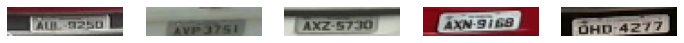

In [130]:
import numpy as np
import torchvision
import matplotlib.pyplot as plt

def imshow(image, ax=None, title=None, normalize=True):
    if ax is None:
        fig, ax = plt.subplots()
    image = image.numpy().transpose((1, 2, 0))

    if normalize:
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean
        image = np.clip(image, 0, 1)

    ax.imshow(image)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.tick_params(axis='both', length=0)
    ax.set_xticklabels('')
    ax.set_yticklabels('')

    return ax
batch_size = 16
train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, num_workers=0)
valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, num_workers=0)
trainimages, trainlabels = next(iter(train_loader))

fig, axes = plt.subplots(figsize=(12, 12), ncols=5)
print('training images')
for i in range(5):
    axe1 = axes[i] 
    imshow(trainimages[i], ax=axe1, normalize=False)
    print(trainlabels[i])

print(trainimages[0].size())

In [120]:
import torch
import torch.nn as nn
import torch.nn.functional as F



class YoloLiteModified(nn.Module):
  def __init__(self):
    super(YoloLiteModified, self).__init__()
    self.n_classes = 7*36

    self.classification = nn.Sequential(
        nn.Conv2d(in_channels= 3, out_channels= 16, kernel_size= 3, stride= 1, padding = 1),
#         nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2),
        nn.Conv2d(in_channels= 16, out_channels = 32, kernel_size= 3, stride = 1, padding = 1),
#         nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),
        nn.Conv2d(in_channels=32, out_channels= 64, kernel_size= 3, stride= 1, padding = 1),
#         nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),
        
        
        nn.Conv2d(in_channels=64, out_channels= 128, kernel_size= 3, stride= 1, padding = 1),
# #         nn.ReLU(),
        nn.MaxPool2d(kernel_size = 2),
        nn.Flatten(),
        
#         nn.Linear(in_features=1024,out_features=512,bias=False),
        nn.Linear(in_features=512,out_features=self.n_classes,bias=False)
#         nn.Conv2d(in_channels=128, out_channels= 128, kernel_size= 3, stride= 1, padding = 1),
# #         nn.ReLU(),
#         nn.MaxPool2d(kernel_size = 2),
#         nn.Conv2d(in_channels=128, out_channels= self.n_classes, kernel_size= 3, stride= 1, padding = 1),
# #         nn.ReLU(),
#         nn.MaxPool2d(kernel_size = 2),
#         nn.Flatten()
# #         nn.Linear(in_features = 256, out_features = self.n_classes, bias = False),
        
#         nn.Conv2d(in_channels=32, out_channels= 64, kernel_size= 3, stride= 1, padding = 1),
#         nn.ReLU(),
#         nn.MaxPool2d(kernel_size = 2),
        
    )

  def forward(self, x):
    logits = self.classification(x)
    return logits.view(-1,7,36)
#     prob_of_class = F.softmax(logits, dim = -1)
#     return prob_of_class
    return logits#, prob_of_class



In [121]:
from torchsummary import summary
model = YoloLiteModified()
summary(model,(3,16,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 16, 64]             448
         MaxPool2d-2            [-1, 16, 8, 32]               0
            Conv2d-3            [-1, 32, 8, 32]           4,640
         MaxPool2d-4            [-1, 32, 4, 16]               0
            Conv2d-5            [-1, 64, 4, 16]          18,496
         MaxPool2d-6             [-1, 64, 2, 8]               0
            Conv2d-7            [-1, 128, 2, 8]          73,856
         MaxPool2d-8            [-1, 128, 1, 4]               0
           Flatten-9                  [-1, 512]               0
           Linear-10                  [-1, 252]         129,024
Total params: 226,464
Trainable params: 226,464
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.01
Forward/backward pass size (MB): 0.30
Params size (MB): 0.86
Estimated T

In [122]:
num_epochs = 50
num_classes = 252
batch_size = 16
learning_rate = 0.001

loss_fn = F.mse_loss
def criterion(output, target,batch_size):
#     print(output.shape)
    y=F.softmax(output,dim=-1)
    return loss_fn(y,target)
# optimizer = torch.optim.Adam(model.parameters(),lr = learning_rate)
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)
def save_ckp(model, optimizer,epoch,file_prefix):
    checkpoint = {'model': model,
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}
    filename=file_prefix+"_"+str(epoch)+".pth"
    torch.save(checkpoint, filename)

In [123]:
a=torch.Tensor([[[1.,0.],[0.,1.],[1., 0.]],[[1.,0.],[0.,1.],[1., 0.]]])
print(a.shape)
b=torch.Tensor([[[0.5,0.5],[0.3,0.7],[1., 0.]],[[0.2,0.8],[0.9,0.1],[1., 0.]]])

loss_fn = nn.CrossEntropyLoss()
l=loss_fn(a,b)
# print(l.shape)
# print(l)

torch.sum(b,dim=-1)

torch.Size([2, 3, 2])


tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [124]:
%%time
# keeping-track-of-losses 
device = torch.device('cpu')
train_losses = []
valid_losses = []
file_prefix="./models/nameplaterecognize/nameplaterecognize_checkpoint"
for epoch in range(1, num_epochs + 1):
    # keep-track-of-training-and-validation-loss
    train_loss = 0.0
    valid_loss = 0.0
    
    # training-the-model
    model.train()
    batch_no =0
    num_correct_train_data = 0
    
    for data, target in train_loader:
        print("Batch",batch_no)
        # move-tensors-to-GPU 
#         print(data,type(data))
#         print(target,type(target))
        data = data.to(device)
        target = target.to(device)
        
        # clear-the-gradients-of-all-optimized-variables
        optimizer.zero_grad()
        # forward-pass: compute-predicted-outputs-by-passing-inputs-to-the-model
        output = model(data)
        # calculate-the-batch-loss
        batch_size=data.size(0)
        loss = criterion(output, target,batch_size)
        
        # backward-pass: compute-gradient-of-the-loss-wrt-model-parameters
        loss.backward()
        # perform-a-single-optimization-step (parameter-update)
        optimizer.step()
        # update-training-loss
        train_loss += loss.item() * data.size(0)
        batch_no +=1
    
    # validate-the-model
    model.eval()
    for data, target in valid_loader:
        
        data = data.to(device)
        target = target.to(device)
        
        output = model(data)
        
        loss = criterion(output, target,data.size(0))
        
        # update-average-validation-loss 
        valid_loss += loss.item() * data.size(0)
    
    # calculate-average-losses
    train_loss = train_loss/len(train_loader.sampler)
    valid_loss = valid_loss/len(valid_loader.sampler)
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
        
    # print-training/validation-statistics 
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f}'.format(
        epoch, train_loss, valid_loss))
    print("Training Losses",train_losses)
    print("Valid Losses",valid_losses)
    save_ckp(model,optimizer,epoch,file_prefix)

Batch 0
Batch 1
Batch 2
Batch 3
Batch 4
Batch 5
Batch 6
Batch 7
Batch 8
Batch 9
Batch 10
Batch 11
Batch 12
Batch 13
Batch 14
Batch 15
Batch 16
Batch 17
Batch 18
Batch 19
Batch 20
Batch 21
Batch 22
Batch 23
Batch 24
Batch 25
Batch 26
Batch 27
Batch 28
Batch 29
Batch 30
Batch 31
Batch 32
Batch 33
Batch 34
Batch 35
Batch 36
Batch 37
Batch 38
Batch 39
Batch 40
Batch 41
Batch 42
Batch 43
Batch 44
Batch 45
Batch 46
Batch 47
Batch 48
Batch 49
Batch 50
Batch 51
Batch 52
Batch 53
Batch 54
Batch 55
Batch 56
Batch 57
Batch 58
Batch 59
Batch 60
Batch 61
Batch 62
Batch 63
Batch 64
Batch 65
Batch 66
Batch 67
Batch 68
Batch 69
Batch 70
Batch 71
Batch 72
Batch 73
Batch 74
Batch 75
Batch 76
Batch 77
Batch 78
Batch 79
Batch 80
Batch 81
Batch 82
Batch 83
Batch 84
Batch 85
Batch 86
Batch 87
Batch 88
Batch 89
Batch 90
Batch 91
Batch 92
Batch 93
Batch 94
Batch 95
Batch 96
Batch 97
Batch 98
Batch 99
Batch 100
Batch 101
Batch 102
Batch 103
Batch 104
Batch 105
Batch 106
Batch 107
Batch 108
Batch 109
Batch 110


Batch 88
Batch 89
Batch 90
Batch 91
Batch 92
Batch 93
Batch 94
Batch 95
Batch 96
Batch 97
Batch 98
Batch 99
Batch 100
Batch 101
Batch 102
Batch 103
Batch 104
Batch 105
Batch 106
Batch 107
Batch 108
Batch 109
Batch 110
Batch 111
Batch 112
Batch 113
Batch 114
Batch 115
Batch 116
Batch 117
Batch 118
Batch 119
Batch 120
Batch 121
Batch 122
Batch 123
Batch 124
Batch 125
Batch 126
Batch 127
Batch 128
Batch 129
Batch 130
Batch 131
Batch 132
Batch 133
Batch 134
Batch 135
Batch 136
Batch 137
Batch 138
Batch 139
Batch 140
Batch 141
Batch 142
Batch 143
Batch 144
Batch 145
Batch 146
Batch 147
Batch 148
Batch 149
Batch 150
Batch 151
Batch 152
Batch 153
Batch 154
Batch 155
Batch 156
Batch 157
Batch 158
Batch 159
Batch 160
Batch 161
Batch 162
Batch 163
Batch 164
Batch 165
Batch 166
Batch 167
Batch 168
Batch 169
Batch 170
Batch 171
Batch 172
Batch 173
Batch 174
Batch 175
Batch 176
Batch 177
Batch 178
Batch 179
Batch 180
Batch 181
Batch 182
Batch 183
Batch 184
Batch 185
Batch 186
Batch 187
Batch 188
Ba

Batch 164
Batch 165
Batch 166
Batch 167
Batch 168
Batch 169
Batch 170
Batch 171
Batch 172
Batch 173
Batch 174
Batch 175
Batch 176
Batch 177
Batch 178
Batch 179
Batch 180
Batch 181
Batch 182
Batch 183
Batch 184
Batch 185
Batch 186
Batch 187
Batch 188
Batch 189
Batch 190
Batch 191
Batch 192
Batch 193
Batch 194
Batch 195
Batch 196
Batch 197
Batch 198
Batch 199
Batch 200
Batch 201
Batch 202
Batch 203
Batch 204
Batch 205
Batch 206
Batch 207
Batch 208
Batch 209
Batch 210
Batch 211
Batch 212
Batch 213
Batch 214
Batch 215
Batch 216
Batch 217
Batch 218
Batch 219
Batch 220
Batch 221
Batch 222
Batch 223
Batch 224
Batch 225
Batch 226
Batch 227
Batch 228
Batch 229
Batch 230
Batch 231
Batch 232
Batch 233
Batch 234
Batch 235
Batch 236
Batch 237
Batch 238
Batch 239
Batch 240
Batch 241
Batch 242
Batch 243
Batch 244
Batch 245
Batch 246
Batch 247
Batch 248
Batch 249
Batch 250
Batch 251
Batch 252
Batch 253
Batch 254
Batch 255
Batch 256
Batch 257
Batch 258
Batch 259
Batch 260
Batch 261
Batch 262
Batch 263


Batch 235
Batch 236
Batch 237
Batch 238
Batch 239
Batch 240
Batch 241
Batch 242
Batch 243
Batch 244
Batch 245
Batch 246
Batch 247
Batch 248
Batch 249
Batch 250
Batch 251
Batch 252
Batch 253
Batch 254
Batch 255
Batch 256
Batch 257
Batch 258
Batch 259
Batch 260
Batch 261
Batch 262
Batch 263
Batch 264
Batch 265
Batch 266
Batch 267
Batch 268
Batch 269
Batch 270
Batch 271
Batch 272
Batch 273
Batch 274
Batch 275
Batch 276
Batch 277
Batch 278
Batch 279
Batch 280
Batch 281
Batch 282
Batch 283
Batch 284
Batch 285
Batch 286
Batch 287
Batch 288
Batch 289
Batch 290
Batch 291
Batch 292
Batch 293
Batch 294
Batch 295
Batch 296
Batch 297
Batch 298
Batch 299
Batch 300
Batch 301
Batch 302
Batch 303
Batch 304
Batch 305
Batch 306
Batch 307
Batch 308
Batch 309
Batch 310
Batch 311
Batch 312
Batch 313
Batch 314
Batch 315
Batch 316
Batch 317
Batch 318
Batch 319
Batch 320
Batch 321
Batch 322
Batch 323
Batch 324
Batch 325
Batch 326
Batch 327
Batch 328
Batch 329
Batch 330
Batch 331
Batch 332
Batch 333
Batch 334


KeyboardInterrupt: 

In [35]:
def save_ckp(model, optimizer,epoch,file_prefix):
    checkpoint = {'model': model,
              'state_dict': model.state_dict(),
              'optimizer' : optimizer.state_dict()}
    filename=file_prefix+"_"+str(epoch)+".pth"
    torch.save(checkpoint, filename)
file_prefix = "./models/brand/brand_checkpoint"
save_ckp(model,optimizer,epoch,file_prefix)

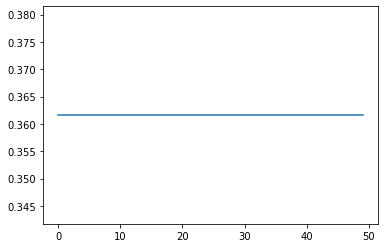

In [35]:
loss_values=[0.3616175138183045, 0.3616175144484813, 0.3616175140426474, 0.36161751379309737, 0.361617515053451, 0.36161751384855295, 0.36161751626339056, 0.36161751490725, 0.36161751388888425, 0.361617514761049, 0.361617513107465, 0.3616175130116781, 0.36161751450393687, 0.36161751447872975, 0.3616175152198177, 0.3616175147358419, 0.36161751460728586, 0.36161751426699035, 0.3616175138157838, 0.3616175143930257, 0.3616175145896409, 0.36161751496522626, 0.3616175153080425, 0.36161751529291825, 0.36161751406029236, 0.3616175142569075, 0.3616175141938898, 0.361617514347653, 0.3616175145619131, 0.3616175147736525, 0.36161751293605693, 0.3616175137199969, 0.3616175153609773, 0.36161751454930957, 0.3616175146551793, 0.361617515053451, 0.36161751449133334, 0.36161751480642174, 0.3616175152046935, 0.3616175153861844, 0.36161751527275254, 0.36161751453670604, 0.3616175142972389, 0.36161751507109596, 0.36161751516436214, 0.3616175149022086, 0.36161751457955804, 0.3616175141762449, 0.3616175146249308, 0.3616175138233459]
x=range(0,len(loss_values))
plt.plot(x,[round(r,6) for r in loss_values])
plt.show()

In [36]:
import torch.onnx 

#Function to Convert to ONNX 
def Convert_ONNX(model): 

    # set the model to inference mode 
    model.eval() 

    # Let's create a dummy input tensor  
    
    dummy_input = torch.randn(1, 3, 64, 64, requires_grad=True)  
    
    # Export the model   
    torch.onnx.export(model,         # model being run 
         dummy_input,       # model input (or a tuple for multiple inputs) 
         "NameplateRecognition.onnx",       # where to save the model  
         export_params=True,  # store the trained parameter weights inside the model file 
         opset_version=10,    # the ONNX version to export the model to 
         do_constant_folding=True,  # whether to execute constant folding for optimization 
         input_names = ['modelInput'],   # the model's input names 
         output_names = ['modelOutput'], # the model's output names 
         dynamic_axes={'modelInput' : {0 : 'batch_size'},    # variable length axes 
                                'modelOutput' : {0 : 'batch_size'}}) 
    print(" ") 
    print('Model has been converted to ONNX') 
Convert_ONNX(model)

 
Model has been converted to ONNX
